### Basic regression: Predict fuel efficiency 

In a regression problem, the aim is to predict the output of a continuous value, like a price or a probability. Contrast this with a classification problem, where the aim is to select a class from a list of classes (for example, where a picture contains an apple or an orange, recognizing which fruit is in the picture).

This tutorial uses the classic Auto MPG dataset and demonstrates how to build models to predict the fuel efficiency of the late-1970s and early 1980s automobiles. To do this, you will provide the models with a description of many automobiles from that time period. This description includes attributes like cylinders, displacement, horsepower, and weight.

This example uses the Keras API. (Visit the Keras tutorials and guides to learn more.)

- source - https://www.tensorflow.org/tutorials/keras/regression



In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)



2024-02-13 11:29:49.210651: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-13 11:29:49.210699: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-13 11:29:49.212028: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-13 11:29:49.218818: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-13 11:29:50.206009: W tensorflow/compiler/tf2

2.15.0


In [2]:
print(tf.config.list_physical_devices('GPU'))

[]


2024-02-13 11:29:51.168869: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:274] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


In [3]:
# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

### Generate dataset to world around with deep learning.

- How we can build a model and improve it.

In [4]:
import random
from scipy import stats

In [5]:
n = 100
arrXtrain = []
arrytrain = []

limit = 0.0

for i in range(0, n):
    arrXtrain.append(i)
    arrytrain.append(2 * i)

In [6]:
n = 80
X = []
y = []

limit = 0.5

for i in range(0, n):
    errx = round(random.uniform(0, limit), 2)
    X.append(i+errx)

    erry = round(random.uniform(0, limit), 2)
    y.append(2 * i + erry)


X_train = np.array(X)
y_train = np.array(y)

X_train, y_train

(array([ 0.49,  1.09,  2.47,  3.05,  4.43,  5.34,  6.27,  7.27,  8.03,
         9.02, 10.5 , 11.17, 12.45, 13.21, 14.28, 15.19, 16.25, 17.22,
        18.02, 19.26, 20.02, 21.37, 22.34, 23.31, 24.1 , 25.25, 26.34,
        27.48, 28.34, 29.07, 30.15, 31.04, 32.16, 33.49, 34.33, 35.12,
        36.4 , 37.07, 38.5 , 39.49, 40.02, 41.27, 42.37, 43.32, 44.46,
        45.12, 46.09, 47.12, 48.32, 49.39, 50.27, 51.46, 52.33, 53.27,
        54.25, 55.36, 56.09, 57.31, 58.49, 59.43, 60.02, 61.05, 62.47,
        63.31, 64.09, 65.21, 66.12, 67.3 , 68.1 , 69.21, 70.22, 71.17,
        72.26, 73.31, 74.44, 75.31, 76.21, 77.36, 78.21, 79.35]),
 array([  0.13,   2.14,   4.48,   6.24,   8.36,  10.09,  12.15,  14.01,
         16.02,  18.44,  20.28,  22.46,  24.33,  26.3 ,  28.11,  30.2 ,
         32.41,  34.44,  36.28,  38.01,  40.31,  42.29,  44.37,  46.45,
         48.29,  50.14,  52.09,  54.25,  56.3 ,  58.05,  60.46,  62.38,
         64.09,  66.03,  68.14,  70.12,  72.06,  74.36,  76.45,  78.28,
      

In [7]:
n = 100
X = []
y = []

for i in range(80, n):
    errx = round(random.uniform(0, limit), 2)
    X.append(i+errx)

    erry = round(random.uniform(0, limit), 2)
    y.append(2 * i + erry)


X_test = np.array(X)
y_test = np.array(y)

X_test , y_test 

(array([80.36, 81.06, 82.09, 83.41, 84.13, 85.44, 86.31, 87.16, 88.1 ,
        89.17, 90.47, 91.4 , 92.23, 93.33, 94.07, 95.07, 96.34, 97.06,
        98.05, 99.35]),
 array([160.1 , 162.16, 164.06, 166.07, 168.29, 170.11, 172.25, 174.12,
        176.18, 178.09, 180.31, 182.24, 184.45, 186.19, 188.26, 190.03,
        192.37, 194.22, 196.22, 198.11]))

In [8]:
# get coeffs of linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(X,y)

In [9]:
# Creating a DataFrame with two columns: 'X' for features and 'y' for the target variable
df = pd.DataFrame({'X': arrXtrain, 'y': arrytrain})

print("DataFrame with two columns (X and y):")
print(df)

DataFrame with two columns (X and y):
     X    y
0    0    0
1    1    2
2    2    4
3    3    6
4    4    8
..  ..  ...
95  95  190
96  96  192
97  97  194
98  98  196
99  99  198

[100 rows x 2 columns]


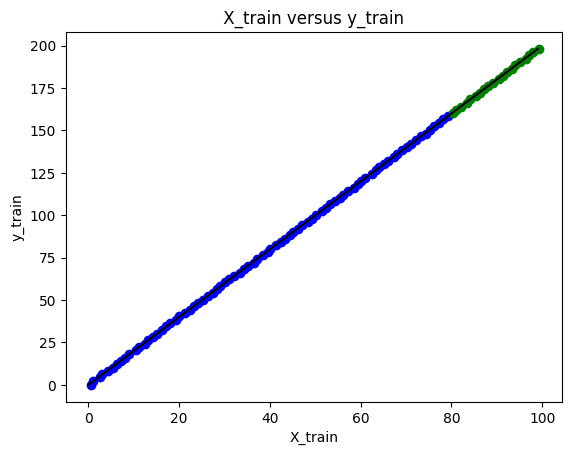

In [10]:
plt.scatter(X_train, y_train, color='b')
plt.scatter(X_test, y_test, color='g')
plt.xlabel('X_train')
plt.ylabel('y_train')
plt.title(' X_train versus y_train ')
plt.plot(arrXtrain, arrytrain, linestyle='-', color='black')  # '-' for solid line style
plt.show()

In [11]:
#Set random seed 
tf.random.set_seed(42) 

# Create a model (same as above) 
model = tf.keras.Sequential([ tf.keras.layers.Dense(1) ]) 

# Compile model (same as above) 
model.compile(loss=tf.keras.losses.mae, 
              optimizer=tf.keras.optimizers.SGD(), 
              metrics=["mae"]) 

# Fit model (this time we'll train for longer) 
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=50) # train for 100 epochs not 10

Epoch 1/50
3/3 [==============================] - 0s 4ms/step - loss: 41.8426 - mae: 41.8426
Epoch 2/50
3/3 [==============================] - 0s 2ms/step - loss: 7.7388 - mae: 7.7388
Epoch 3/50
3/3 [==============================] - 0s 3ms/step - loss: 7.9491 - mae: 7.9491
Epoch 4/50
3/3 [==============================] - 0s 4ms/step - loss: 7.5848 - mae: 7.5848
Epoch 5/50
3/3 [==============================] - 0s 2ms/step - loss: 7.8231 - mae: 7.8231
Epoch 6/50
3/3 [==============================] - 0s 3ms/step - loss: 7.3434 - mae: 7.3434
Epoch 7/50
3/3 [==============================] - 0s 2ms/step - loss: 8.6454 - mae: 8.6454
Epoch 8/50
3/3 [==============================] - 0s 3ms/step - loss: 6.3375 - mae: 6.3375
Epoch 9/50
3/3 [==============================] - 0s 7ms/step - loss: 8.8804 - mae: 8.8804
Epoch 10/50
3/3 [==============================] - 0s 8ms/step - loss: 6.4288 - mae: 6.4288
Epoch 11/50
3/3 [==============================] - 0s 5ms/step - loss: 9.0847 - mae: 9.

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


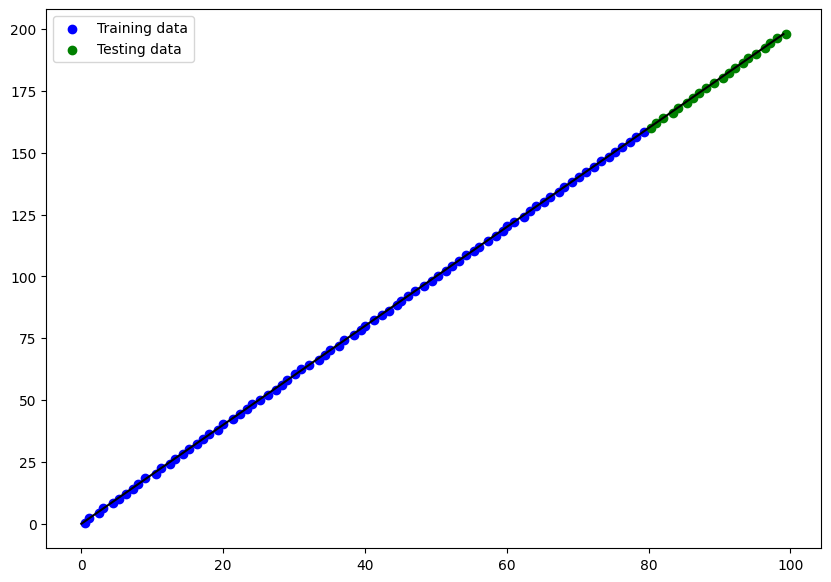

In [13]:
plt.figure(figsize=(10, 7)) 

# Plot training data in blue 
plt.scatter(X_train, y_train, c='b', label='Training data') 

# Plot test data in green 
plt.scatter(X_test, y_test, c='g', label='Testing data') 

plt.plot(arrXtrain, arrytrain, linestyle='-', color='black')  # '-' for solid line style

# Show the legend 
plt.legend();

In [14]:
# Make predictions 
y_preds = model.predict(X_test)
y_preds

1/1 [==============================] - 0s 136ms/step


array([[192.622],
       [194.3  ],
       [196.769],
       [199.933],
       [201.659],
       [204.799],
       [206.884],
       [208.922],
       [211.175],
       [213.74 ],
       [216.856],
       [219.085],
       [221.074],
       [223.711],
       [225.485],
       [227.882],
       [230.926],
       [232.652],
       [235.025],
       [238.141]], dtype=float32)

In [15]:
import seaborn as sns

sns.set(rc={'figure.figsize':(10,5)}, font_scale=1.5)
sns.set_style({'axes.facecolor':'white', 'grid.color': '.4', 'font.family':'Times New Roman'})

In [16]:
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=y_preds, 
                     arrXtrain=arrXtrain, 
                     arrytrain=arrytrain): 
    """ Plots training data, test data and compares predictions. """ 

    plt.figure(figsize=(10, 7)) 
    
    # Plot training data in blue 
    plt.scatter(train_data, train_labels, c="b", label="Training data")
     
    # Plot test data in green 
    plt.scatter(test_data, test_labels, c="g", label="Testing data") 
    
    # Plot the predictions in red (predictions were made on the test data) 
    plt.scatter(test_data, predictions, c="r", label="Predictions")

    plt.plot(arrXtrain, arrytrain, linestyle='-', color='black')  # '-' for solid line style
    
    # Show the legend 
    plt.legend();

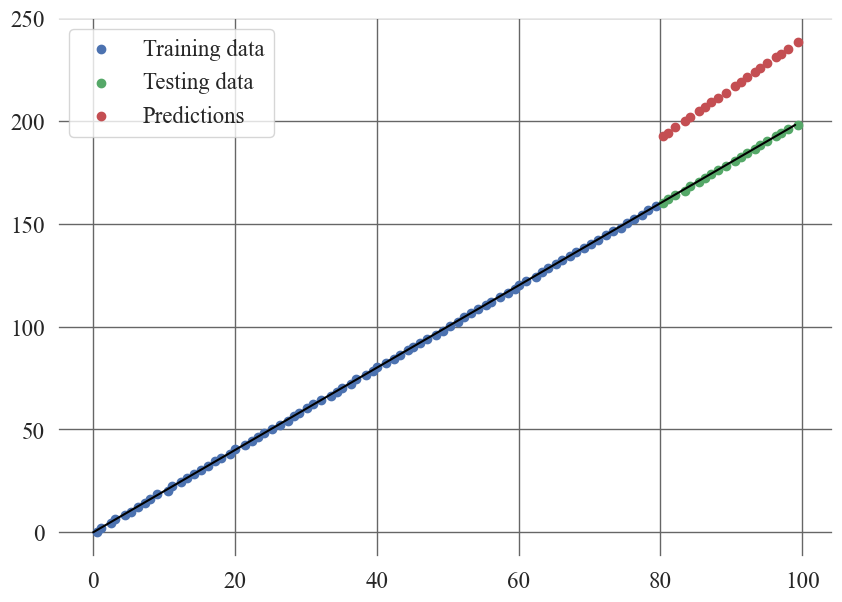

In [17]:
plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test, predictions=y_preds)

In [18]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 101ms/step - loss: 35.8904 - mae: 35.8904


[35.89042282104492, 35.89042282104492]

## Running experiments to improve a model

- model_1 - same as original model, 1 layer, trained for 100 epochs.

In [19]:
# Set random seed 
tf.random.set_seed(42) 

# Replicate original model 
model_1 = tf.keras.Sequential([ tf.keras.layers.Dense(1),
                                tf.keras.layers.Input((128, None, 6)) ]) 

# Compile the model 
model_1.compile(loss=tf.keras.losses.mae, 
                optimizer=tf.keras.optimizers.SGD(), 
                metrics=['mae']) 

# Fit the model 
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
3/3 [==============================] - 0s 3ms/step - loss: 24.1935 - mae: 24.1935
Epoch 2/100
3/3 [==============================] - 0s 3ms/step - loss: 9.3028 - mae: 9.3028
Epoch 3/100
3/3 [==============================] - 0s 2ms/step - loss: 6.8031 - mae: 6.8031
Epoch 4/100
3/3 [==============================] - 0s 4ms/step - loss: 8.7260 - mae: 8.7260
Epoch 5/100
3/3 [==============================] - 0s 6ms/step - loss: 6.8476 - mae: 6.8476
Epoch 6/100
3/3 [==============================] - 0s 2ms/step - loss: 8.6904 - mae: 8.6904
Epoch 7/100
3/3 [==============================] - 0s 2ms/step - loss: 7.7464 - mae: 7.7464
Epoch 8/100
3/3 [==============================] - 0s 2ms/step - loss: 7.6356 - mae: 7.6356
Epoch 9/100
3/3 [==============================] - 0s 2ms/step - loss: 8.5710 - mae: 8.5710
Epoch 10/100
3/3 [==============================] - 0s 2ms/step - loss: 6.6226 - mae: 6.6226
Epoch 11/100
3/3 [==============================] - 0s 3ms/step - loss: 8.870

1/1 [==============================] - 0s 126ms/step


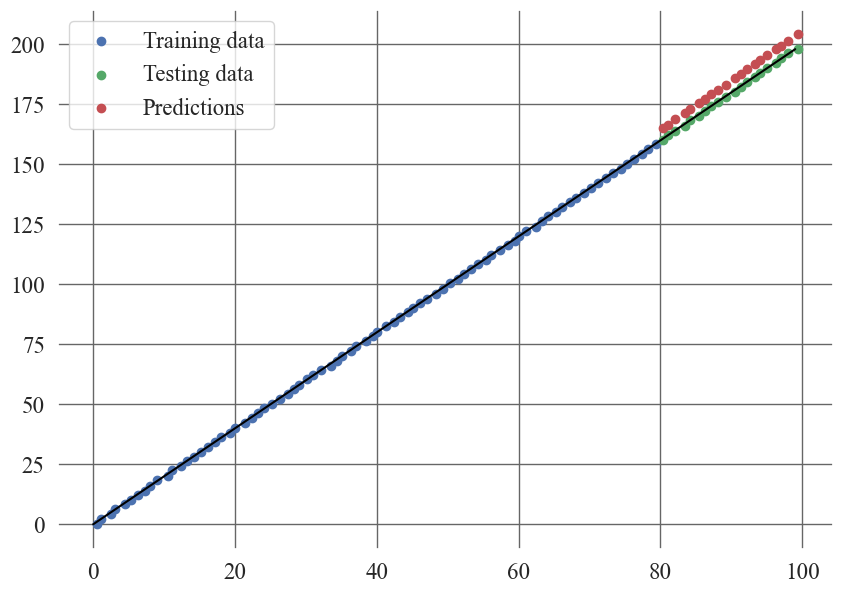

In [20]:
# Make and plot predictions for model_1 
y_preds_1 = model_1.predict(X_test) 

plot_predictions(predictions=y_preds_1)

- ```Build model_2```: This time we'll add an extra dense layer (so now our model will have 2 layers) whilst keeping everything else the same.

In [21]:
# Set random seed 
tf.random.set_seed(42) 

# Replicate model_1 and add an extra layer 
model_2 = tf.keras.Sequential([ tf.keras.layers.Dense(1), 
                               tf.keras.layers.Dense(1) # add a second layer 
                               ]) 

# Compile the model 
model_2.compile(loss=tf.keras.losses.mae, 
                optimizer=tf.keras.optimizers.SGD(), 
                metrics=['mae']) 

# Fit the model 
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0) # set verbose to 0 for less output

1/1 [==============================] - 0s 100ms/step


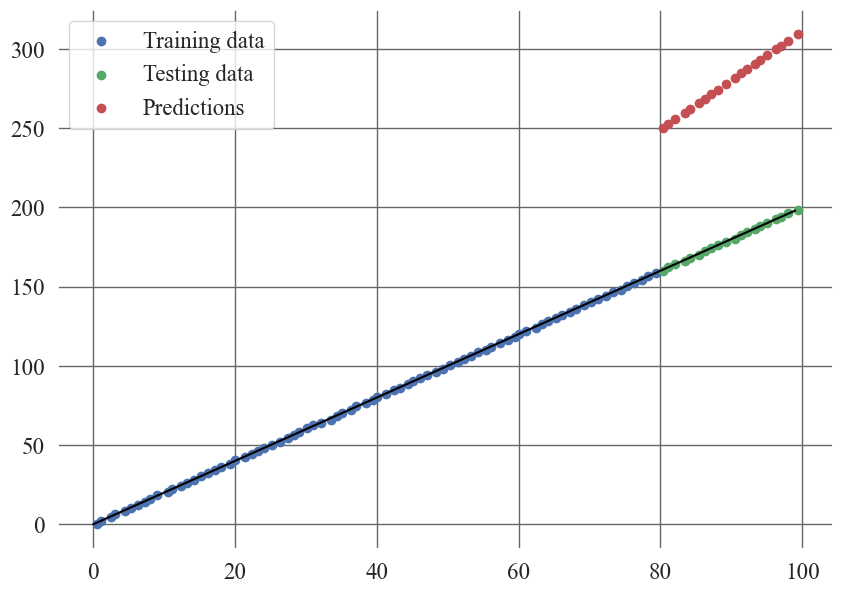

In [22]:
# Make and plot predictions for model_2 
y_preds_2 = model_2.predict(X_test)

plot_predictions(predictions=y_preds_2)

In [23]:
# Set random seed 
tf.random.set_seed(42) 

# Replicate model_2 
model_3 = tf.keras.Sequential([ tf.keras.layers.Dense(1), 
                                tf.keras.layers.Dense(1) ]) 

# Compile the model 
model_3.compile(loss=tf.keras.losses.mae, 
                optimizer=tf.keras.optimizers.SGD(), 
                metrics=['mae']) 

# Fit the model (this time for 500 epochs, not 100) 
model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500, verbose=0) # set verbose to 0 for less output

1/1 [==============================] - 0s 48ms/step


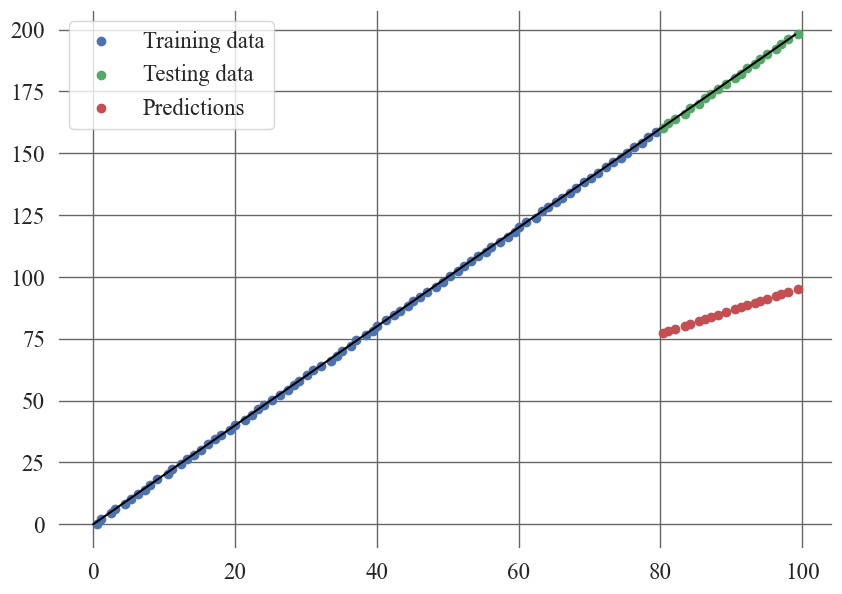

In [24]:
# Make and plot predictions for model_3 
y_preds_3 = model_3.predict(X_test) 

plot_predictions(predictions=y_preds_3)

In [25]:
%%time
# Set random seed 
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(1,), name='input_layer'),  # Hidden layer with 128 units
    tf.keras.layers.Dense(64, activation='relu'),  # Additional hidden layer with 64 units
    tf.keras.layers.Dense(32, activation='relu'),  # Additional hidden layer with 32 units
    tf.keras.layers.Dense(1, name='output_layer')  # Output layer for regression
])

# Compile the model
model_4.compile(optimizer='adam',
              loss='mean_squared_error',  # Use mean squared error for regression
              metrics=['mae'])   

# Assuming X_train and y_train are your input features and labels for training
# Assuming X_val and y_val are your input features and labels for validation

history = model_4.fit(X_train, y_train,
                    epochs=500,
                    batch_size=32,
                    validation_split=0.2, verbose=0)  # 20% of the training data will be used for validation

CPU times: user 12.6 s, sys: 556 ms, total: 13.1 s
Wall time: 14.1 s


1/1 [==============================] - 0s 121ms/step


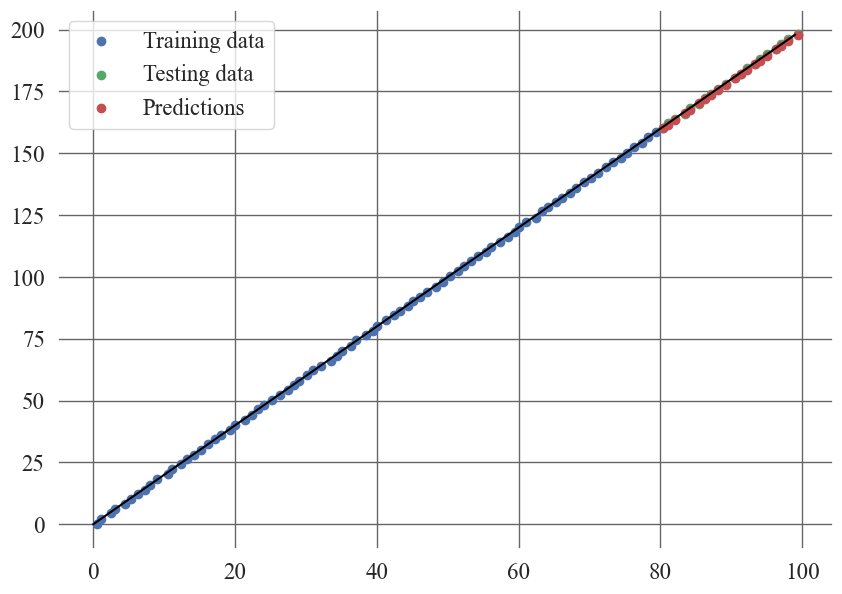

In [26]:
# Make and plot predictions for model_3 
y_preds_4 = model_4.predict(X_test) 

plot_predictions(predictions=y_preds_4)

In [27]:
model_4.evaluate(X_test, y_test)

1/1 [==============================] - 0s 38ms/step - loss: 0.2320 - mae: 0.4085


[0.2319536656141281, 0.4085090756416321]

In [28]:
# MAE
tf.keras.losses.mean_absolute_error(y_test, y_preds)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([14.499, 15.682, 17.712, 20.742, 22.467, 25.607, 27.693, 29.73 ,
       31.983, 34.548, 37.664, 39.893, 41.883, 44.519, 46.293, 48.69 ,
       51.734, 53.46 , 55.833, 58.949], dtype=float32)>

In [29]:
def mae(y_test, y_pred): 
    """ Calculuates mean absolute error between y_test and y_preds. """ 

    return tf.metrics.mean_absolute_error(y_test, y_pred) 

def mse(y_test, y_pred): 
    """ Calculates mean squared error between y_test and y_preds. """
    
    return tf.metrics.mean_squared_error(y_test, y_pred)

In [30]:
mae = mae(y_test, y_preds)
mae

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([14.499, 15.682, 17.712, 20.742, 22.467, 25.607, 27.693, 29.73 ,
       31.983, 34.548, 37.664, 39.893, 41.883, 44.519, 46.293, 48.69 ,
       51.734, 53.46 , 55.833, 58.949], dtype=float32)>

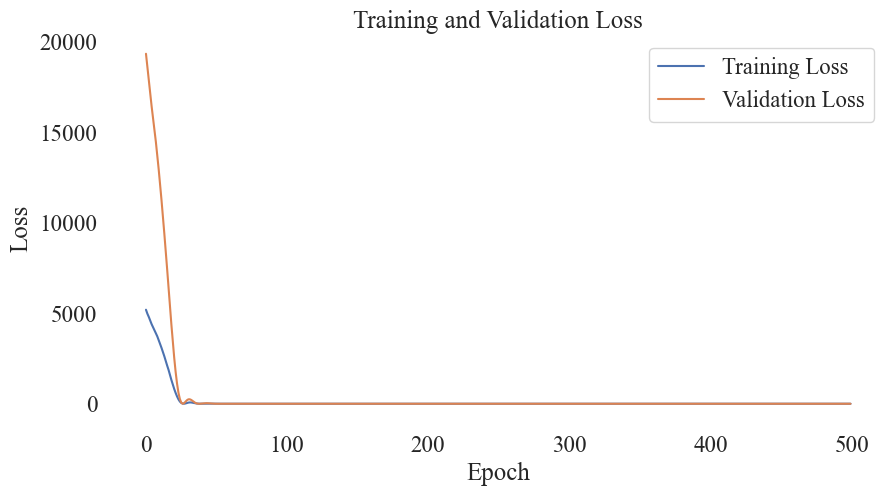

In [31]:
# Plot the training loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

In [32]:
model_4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 128)               256       
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 output_layer (Dense)        (None, 1)                 33        
                                                                 
Total params: 10625 (41.50 KB)
Trainable params: 10625 (41.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


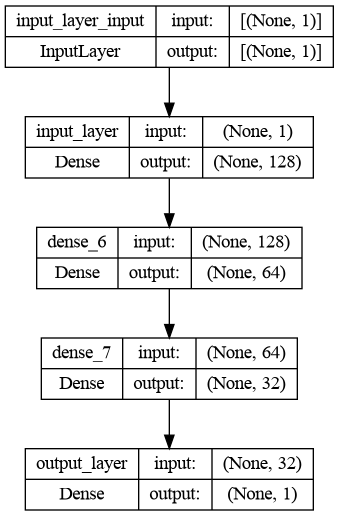

In [33]:
tf.keras.utils.plot_model(
    model_4,
    to_file='model.png',
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=False,
    show_trainable=False
)